In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
data=pd.read_csv(r"C:\Users\mirza\OneDrive\Data Science\data\CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- Bu durum, pazarlama stratejisini tanımlamak için bir müşteri segmentasyonu geliştirmeyi gerektirir. Örnek Veri Kümesi, son 6 ayda yaklaşık 9000 aktif kredi kartı sahibinin kullanım davranışını özetlemektedir. Dosya, 18 davranış değişkeni ile müşteri düzeyindedir.

### Kredi Kartı veri kümesi için Veri Sözlüğü aşağıdadır: 

- CUSTID : Kredi Kartı Sahibi Kimliği (Kategorik)
- BAKİYE : Alışveriş yapmak için hesaplarında kalan bakiye (
- BALANCEFRREQUENCY : Bakiyenin ne sıklıkta güncellendiği, 0 ile 1 arasında puan (1 = sık güncellenen, 0 = sık güncellenmeyen)
- ALIMLAR : Hesaptan yapılan satın alma tutarı
- ONEOFFPURCHASES : Tek seferde yapılan maksimum satın alma tutarı
- TAKSİTLİ ALIMLAR : Taksitli alışveriş tutarı
- CASHADVANCE : Kullanıcı tarafından verilen nakit avans
- SATIN ALMA SIKLIĞI : Alımların ne sıklıkta yapıldığını, 0 ile 1 arasında puan verin (1 = sık satın alındı, 0 = sık satın alınmadı)
- ONEOFFPURCHASESFREQUENCY : Tek seferde satın almaların ne sıklıkta gerçekleştiği (1 = sık satın alınır, 0 = sık satın alınmaz)
- SATIN ALMA TAKSİT SIKLIĞI : Taksitli alışverişlerin ne sıklıkla yapıldığı (1=sık yapılır, 0=sık yapılmaz)
- CASHADVANCEFRQUENCY : Peşin ödemenin ne sıklıkla yapıldığı
- CASHADVANCETRX : "Gelişmiş Nakit" ile Yapılan İşlem Sayısı
- PURCHASESTRX : Yapılan satın alma işlemi sayısı
- CREDITLIMIT : Kullanıcı için Kredi Kartı Limiti
- ÖDEMELER : Kullanıcı tarafından yapılan Ödeme Tutarı
- MINIMUM_PAYMENTS : Kullanıcı tarafından yapılan minimum ödeme tutarı
- PRCFULLPAYMENT : Kullanıcı tarafından ödenen tam ödemenin yüzdesi
- TENURE : Kullanıcı için kredi kartı hizmetinin kullanım süresi 

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [27]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [33]:
data["PRC_FULL_PAYMENT"]

0       0.000000
1       0.222222
2       0.000000
3       0.000000
4       0.000000
          ...   
8945    0.500000
8946    0.000000
8947    0.250000
8948    0.250000
8949    0.000000
Name: PRC_FULL_PAYMENT, Length: 8950, dtype: float64

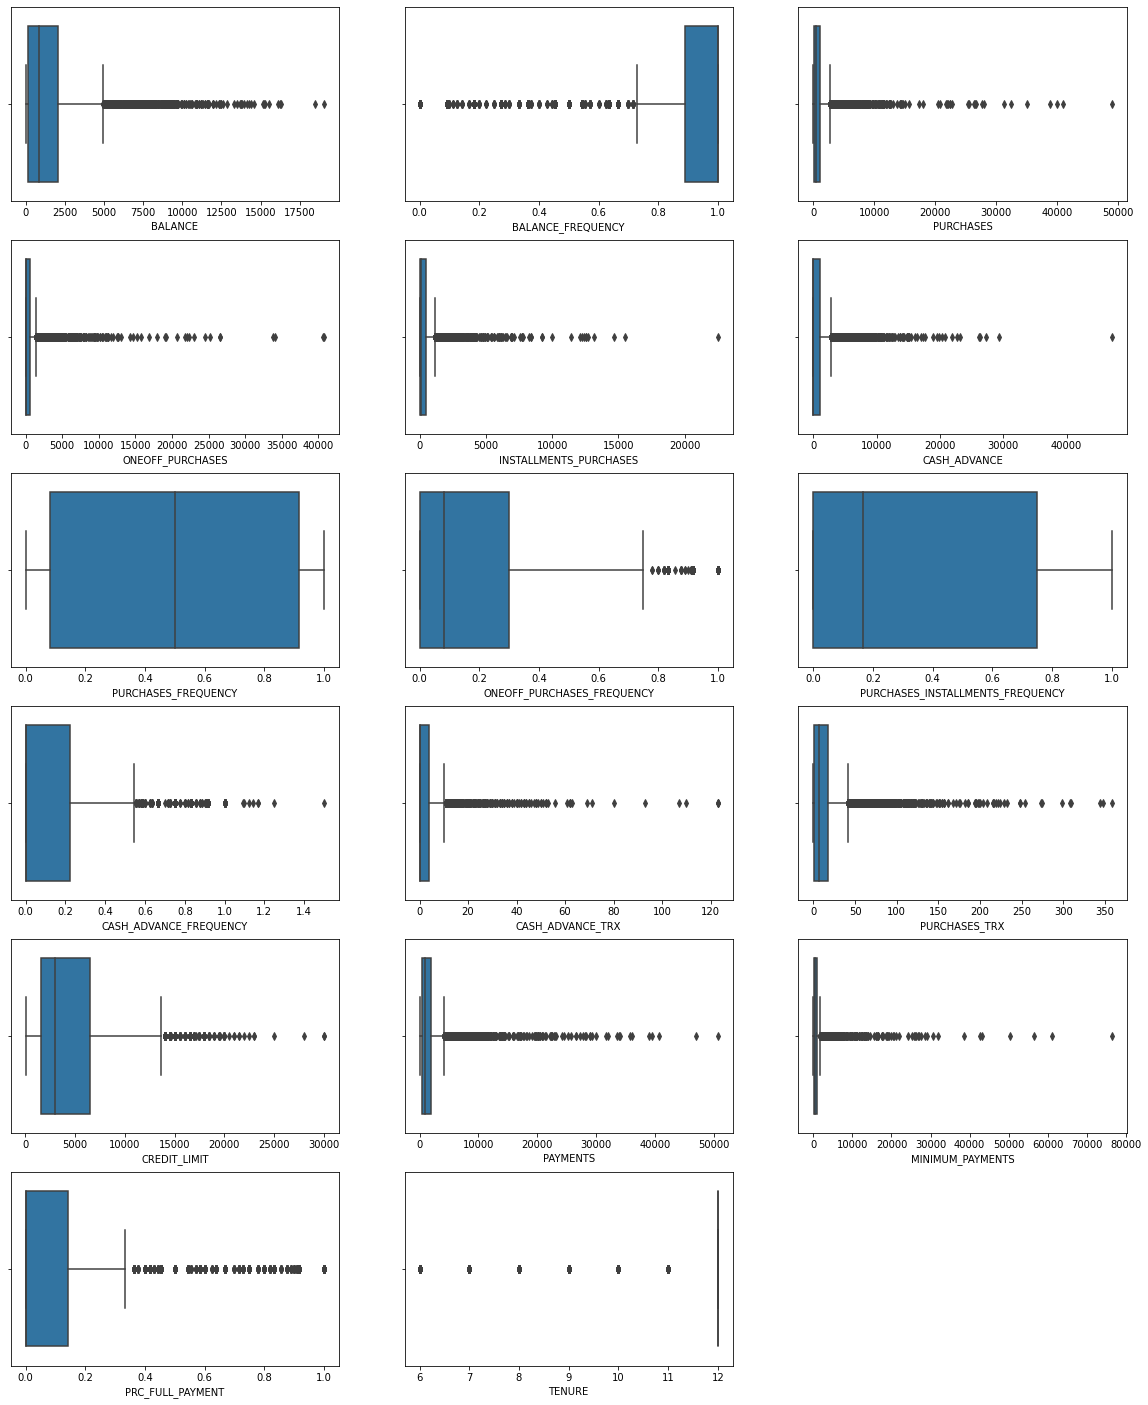

In [31]:
df=data.drop(["CUST_ID"], axis =1)

plt.figure(figsize=(20,25))
for i, col in enumerate(df):
    plt.subplot(6,3,i+1)
    sns.boxplot(df[col]);